<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(_1_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.2_n20.csv',
 'data_multi_delta_-1.2_n30.csv',
 'data_multi_delta_-1.2_n60.csv',
 'data_multi_delta_-1.2_n120.csv',
 'data_multi_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,95.746720,38.874248,-0.028725,144.592242,144.625514,-0.033272
1,0.0,1.0,22.084793,52.315409,0.036416,84.436618,84.437658,-0.001040
2,0.0,2.0,67.300193,86.008222,-0.112867,163.195547,163.285910,-0.090363
3,0.0,3.0,62.788603,56.843058,-0.023063,129.608598,129.639599,-0.031001
4,0.0,4.0,83.186588,31.275356,-0.183351,124.278593,124.481479,-0.202885
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,23.517981,76.261707,-0.049801,109.729887,109.782774,-0.052888
59996,999.0,56.0,59.490452,61.363275,0.007589,130.861317,130.869153,-0.007836
59997,999.0,57.0,25.366995,43.449935,-0.071103,78.745828,78.795853,-0.050025
59998,999.0,58.0,74.694476,20.616130,0.051272,105.361878,105.304588,0.057290


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,95.746720,38.874248,-0.028725,144.592242,144.625514,-0.033272
1,0.0,1.0,22.084793,52.315409,0.036416,84.436618,84.437658,-0.001040
2,0.0,2.0,67.300193,86.008222,-0.112867,163.195547,163.285910,-0.090363
3,0.0,3.0,62.788603,56.843058,-0.023063,129.608598,129.639599,-0.031001
4,0.0,4.0,83.186588,31.275356,-0.183351,124.278593,124.481479,-0.202885
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,23.517981,76.261707,-0.049801,109.729887,109.782774,-0.052888
59996,999.0,56.0,59.490452,61.363275,0.007589,130.861317,130.869153,-0.007836
59997,999.0,57.0,25.366995,43.449935,-0.071103,78.745828,78.795853,-0.050025
59998,999.0,58.0,74.694476,20.616130,0.051272,105.361878,105.304588,0.057290


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    95.746720  38.874248 -0.028725  144.592242  144.625514 -0.033272
      1.0    22.084793  52.315409  0.036416   84.436618   84.437658 -0.001040
      2.0    67.300193  86.008222 -0.112867  163.195547  163.285910 -0.090363
      3.0    62.788603  56.843058 -0.023063  129.608598  129.639599 -0.031001
      4.0    83.186588  31.275356 -0.183351  124.278593  124.481479 -0.202885
...                ...        ...       ...         ...         ...       ...
999.0 55.0   23.517981  76.261707 -0.049801  109.729887  109.782774 -0.052888
      56.0   59.490452  61.363275  0.007589  130.861317  130.869153 -0.007836
      57.0   25.366995  43.449935 -0.071103   78.745828   78.795853 -0.050025
      58.0   74.694476  20.616130  0.051272  105.361878  105.304588  0.057290
      59.0   49.252894  88.837812  0.061997  148.152703  148.120599  0.032104

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    95.746720  38.874248 -0.028725  144.592242  144.625514 -0.033272
      1.0    22.084793  52.315409  0.036416   84.436618   84.437658 -0.001040
      2.0    67.300193  86.008222 -0.112867  163.195547  163.285910 -0.090363
      3.0    62.788603  56.843058 -0.023063  129.608598  129.639599 -0.031001
      4.0    83.186588  31.275356 -0.183351  124.278593  124.481479 -0.202885
...                ...        ...       ...         ...         ...       ...
999.0 55.0   23.517981  76.261707 -0.049801  109.729887  109.782774 -0.052888
      56.0   59.490452  61.363275  0.007589  130.861317  130.869153 -0.007836
      57.0   25.366995  43.449935 -0.071103   78.745828   78.795853 -0.050025
      58.0   74.694476  20.616130  0.051272  105.361878  105.304588  0.057290
      59.0   49.252894  88.837812  0.061997  148.152703  148.120599  0.032104

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,95.746720,38.874248,-0.028725,144.592242,144.625514,-0.033272
1,0.0,1.0,22.084793,52.315409,0.036416,84.436618,84.437658,-0.001040
2,0.0,2.0,67.300193,86.008222,-0.112867,163.195547,163.285910,-0.090363
3,0.0,3.0,62.788603,56.843058,-0.023063,129.608598,129.639599,-0.031001
4,0.0,4.0,83.186588,31.275356,-0.183351,124.278593,124.481479,-0.202885
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,23.517981,76.261707,-0.049801,109.729887,109.782774,-0.052888
59996,999.0,56.0,59.490452,61.363275,0.007589,130.861317,130.869153,-0.007836
59997,999.0,57.0,25.366995,43.449935,-0.071103,78.745828,78.795853,-0.050025
59998,999.0,58.0,74.694476,20.616130,0.051272,105.361878,105.304588,0.057290


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    95.746720  38.874248 -0.028725  144.592242  144.625514 -0.033272
      1.0    22.084793  52.315409  0.036416   84.436618   84.437658 -0.001040
      2.0    67.300193  86.008222 -0.112867  163.195547  163.285910 -0.090363
      3.0    62.788603  56.843058 -0.023063  129.608598  129.639599 -0.031001
      4.0    83.186588  31.275356 -0.183351  124.278593  124.481479 -0.202885
...                ...        ...       ...         ...         ...       ...
999.0 55.0   23.517981  76.261707 -0.049801  109.729887  109.782774 -0.052888
      56.0   59.490452  61.363275  0.007589  130.861317  130.869153 -0.007836
      57.0   25.366995  43.449935 -0.071103   78.745828   78.795853 -0.050025
      58.0   74.694476  20.616130  0.051272  105.361878  105.304588  0.057290
      59.0   49.252894  88.837812  0.061997  148.152703  148.120599  0.032104

[60000 rows x 6 columns]

<AxesSubplot:xlabel='x2', ylabel='e'>

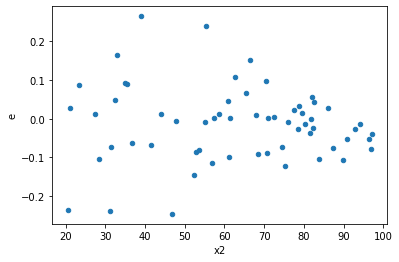

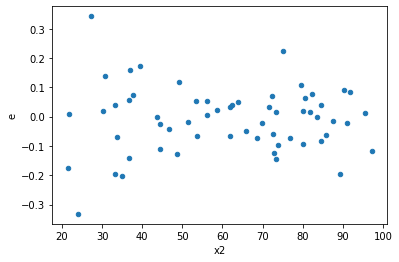

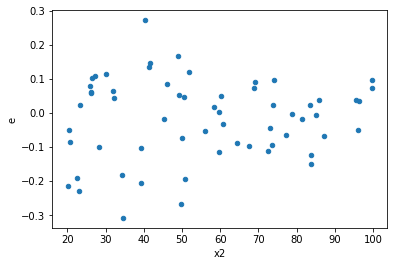

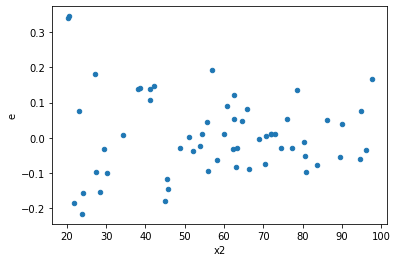

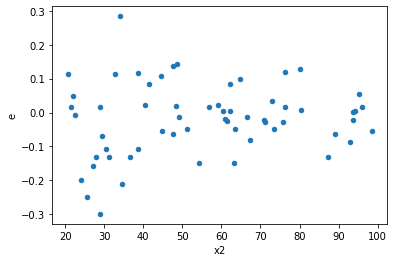

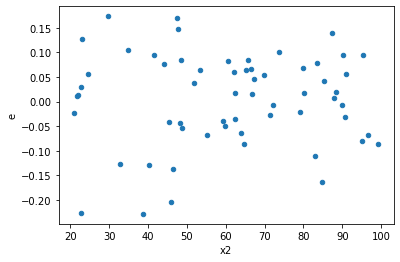

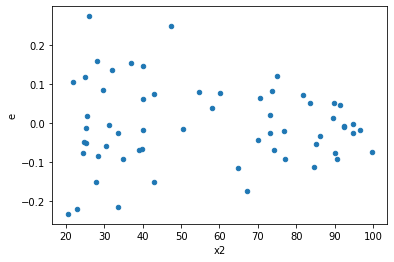

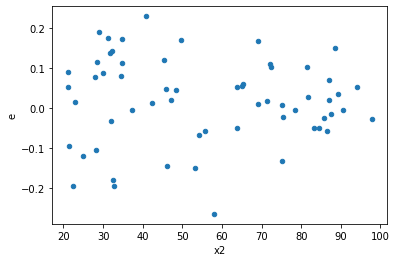

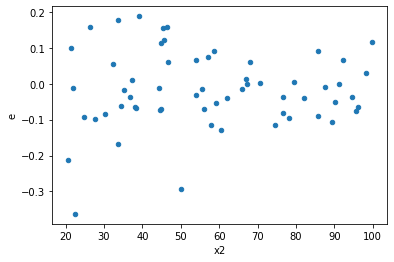

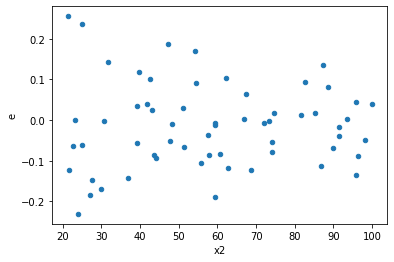

In [12]:
tablenew0 = table.loc[5.0]
tablenew1 = table.loc[6.0]
tablenew2 = table.loc[8.0]
tablenew3 = table.loc[9.0]
tablenew4 = table.loc[15.0]
tablenew5 = table.loc[17.0]
tablenew6 = table.loc[19.0]
tablenew7 = table.loc[20.0]
tablenew8 = table.loc[21.0]
tablenew9 = table.loc[22.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

<ipython-input-14-7bd20896c3a8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity'


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
34.0,22.0,22.0,0.16604604103586781,0.17410885210067167,0.007547547319812173,0.007914038731848712,1.0485576832455896,0.9124583343350121,0.5437708328324939,0.45622916716750606,Reject001=1 : Homoscedasticity
78.0,22.0,22.0,0.14810479518339004,0.1735714181795821,0.006732036144699547,0.007889609917253732,1.1719500233916003,0.7130833146916311,0.6434583426541844,0.35654165734581555,Reject001=1 : Homoscedasticity
91.0,22.0,22.0,0.20751024582304806,0.21700327144607168,0.009432283901047639,0.00986378506573053,1.045747262191182,0.9173947750202309,0.5413026124898845,0.45869738751011546,Reject001=1 : Homoscedasticity
93.0,22.0,22.0,0.17704162995511202,0.22077739960184165,0.008047346816141455,0.010035336345538257,1.2470366413697085,0.609077246967221,0.6954613765163895,0.3045386234836105,Reject001=1 : Homoscedasticity
107.0,22.0,22.0,0.18339644117125883,0.20332952058204376,0.008336201871420855,0.009242250935547444,1.1086884744517538,0.8109600474063934,0.5945199762968033,0.4054800237031967,Reject001=1 : Homoscedasticity
135.0,22.0,22.0,0.1605647826953906,0.1793544672472141,0.007298399213426845,0.008152475783964276,1.1170224518502891,0.7975339117019322,0.6012330441490339,0.3987669558509661,Reject001=1 : Homoscedasticity
140.0,22.0,22.0,0.14043052706752326,0.1518848239627804,0.006383205775796512,0.006903855634671837,1.0815655764771828,0.8557501096101896,0.5721249451949052,0.4278750548050948,Reject001=1 : Homoscedasticity
143.0,22.0,22.0,0.08936305170621751,0.12995248387947336,0.00406195689573716,0.005906931085430608,1.4542082146734903,0.3866090537593889,0.8066954731203055,0.19330452687969446,Reject001=1 : Homoscedasticity
173.0,22.0,22.0,0.09709350624173187,0.10427248707196464,0.004413341192805994,0.00473965850327112,1.073938835954275,0.8686418508282736,0.5656790745858632,0.4343209254141368,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,0.37987812480273,0.14560624399205016,0.01726718749103318,0.00661846563600228,0.38329725900290584,0.029001668558809406,Reject001=1 : Homoscedasticity
1.0,22.0,22.0,0.17360253301195563,0.07974655313723665,0.007891024227816165,0.0036248433244198477,0.4593628431201789,0.07474566736421716,Reject001=1 : Homoscedasticity
2.0,22.0,22.0,0.24443629476576217,0.15205104539338793,0.011110740671171009,0.006911411154244906,0.6220477427016108,0.27319277255089686,Reject001=1 : Homoscedasticity
3.0,22.0,22.0,0.16189531531661897,0.13003153638476705,0.007358877968937225,0.005910524381125775,0.803182822989437,0.6116645994906934,Reject001=1 : Homoscedasticity
4.0,22.0,22.0,0.35854511496888186,0.20024689299369078,0.016297505225858266,0.009102131499713216,0.5584984556575822,0.17979066673068467,Reject001=1 : Homoscedasticity
5.0,22.0,22.0,0.3597597290987489,0.11184542326184517,0.01635271495903404,0.005083882875538417,0.3108892247112661,0.008334774044482185,Reject001=0 : Heteroscedasticity
6.0,22.0,22.0,0.4633087064413032,0.14542623361664564,0.021059486656422873,0.006610283346211165,0.31388625250250884,0.008854930511225883,Reject001=0 : Heteroscedasticity
7.0,22.0,22.0,0.17091025269765064,0.13463088905421755,0.007768647849893211,0.006119585866100798,0.7877285705754984,0.5805349532929662,Reject001=1 : Homoscedasticity
8.0,22.0,22.0,0.5326260229154648,0.16027356629206985,0.024210273768884762,0.007285162104184993,0.30091200841966276,0.006768308863784848,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      785
Reject001=0 : Heteroscedasticity    215
Name: Result_test, dtype: int64